In [7]:
import pandas as pd

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
df = pd.read_csv("SeoulBikeData.csv")

In [11]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


To verify there are no missing values in the data frame:

In [12]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

To see the correlations between the variables:

<AxesSubplot:>

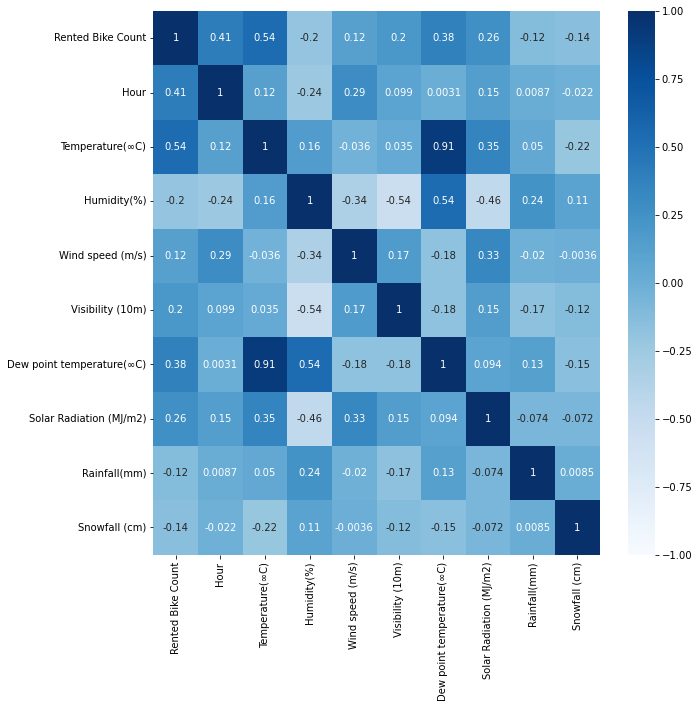

In [13]:
plt.figure(figsize = (10,10))
correlation = df.corr("pearson")
sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = 'Blues', annot = True)


We see that there is a high corelation between Temperature and Dew Point Temperature, so we are dropping Dew Point Temperature. We also see that there is high correlation between 'Rented Bike Count (y)' and 'Hour', 'Temperature', and 'Solar Radiation'. So we are dropping as they are not as important as the ones mentioned.


In [14]:
#Extracting categorical features

categorical_features = df.select_dtypes(include='object')
categorical_features

,Date,Seasons,Holiday,Functioning Day
0,1/12/2017,Winter,No Holiday,Yes
1,1/12/2017,Winter,No Holiday,Yes
2,1/12/2017,Winter,No Holiday,Yes
3,1/12/2017,Winter,No Holiday,Yes
4,1/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


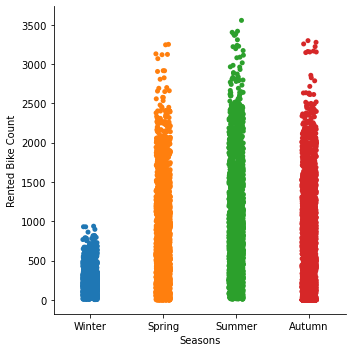

In [15]:
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

The demand of rented bikes during winter season is less

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(∞C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(∞C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Multiple Linear Regression

In [17]:

df["Holiday"] = df["Holiday"].astype("category").cat.codes
df["Functioning Day"] = df["Functioning Day"].astype("category").cat.codes

y = dict()
X = dict()
seasons = df["Seasons"].unique()
for season in seasons:
    y[season] = df[df["Seasons"] == season]["Rented Bike Count"]
    # X[season] = df[df["Seasons"] == season].drop(["Rented Bike Count", "Date", "Humidity(%)", "Rainfall(mm)", "Snowfall (cm)", "Seasons"], axis=1)
    X[season] = df[df["Seasons"] == season].drop(["Rented Bike Count", "Date", "Seasons"], axis=1)

In [18]:
x_train = dict()
x_test = dict()
y_train = dict()
y_test = dict()

for season in seasons:
    x_train[season], x_test[season], y_train[season], y_test[season] = train_test_split(X[season], y[season], test_size = 0.25)


In [19]:
linregfit = dict()
predtrain = dict()
predtest = dict()

for season in seasons:
    linregfit[season] = linear_model.LinearRegression().fit(x_train[season], y_train[season])
    predtrain[season] = linregfit[season].predict(x_train[season])
    predtest[season] = linregfit[season].predict(x_test[season])

In [20]:
for season in seasons:
     linreg_train_r2score = r2_score(y_train[season], predtrain[season])
     trainset_rmse = (np.sqrt(mean_squared_error(predtrain[season], y_train[season])))
     print('For Multiple Linear Regression, R2 train score is : {} and the train root mean square is: {} for Season: {}'
          .format(linreg_train_r2score,trainset_rmse,season))

     linreg_test_r2score = r2_score(y_test[season], predtest[season])
     testset_rmse = (np.sqrt(mean_squared_error(predtest[season], y_test[season])))
     print('For Multiple Linear Regression, R2 test score is : {} and the test root mean square is: {} for Season: {}'
          .format(linreg_test_r2score,testset_rmse,season))


For Multiple Linear Regression, R2 train score is : 0.3504490299777029 and the train root mean square is: 120.83717173458075 for Season: Winter
For Multiple Linear Regression, R2 test score is : 0.31669536542852395 and the test root mean square is: 125.2720341782251 for Season: Winter
For Multiple Linear Regression, R2 train score is : 0.5815938044800764 and the train root mean square is: 396.6624602179636 for Season: Spring
For Multiple Linear Regression, R2 test score is : 0.5428901257273901 and the test root mean square is: 435.84312239992255 for Season: Spring
For Multiple Linear Regression, R2 train score is : 0.5093235046214908 and the train root mean square is: 490.10928846075893 for Season: Summer
For Multiple Linear Regression, R2 test score is : 0.5109830462536333 and the test root mean square is: 459.73011462399126 for Season: Summer
For Multiple Linear Regression, R2 train score is : 0.5687834079314467 and the train root mean square is: 428.7755106885461 for Season: Autumn


Ridge Regression with alpha = 0.001

In [21]:
alpha = 0.001

In [22]:
linridge = dict()

for season in seasons:
     linridge[season] = Ridge(alpha = alpha, max_iter=int(10 / alpha), ).fit(x_train[season], y_train[season])
     linridge_train_r2score = linridge[season].score(x_train[season], y_train[season])
     linridge_test_r2score = linridge[season].score(x_test[season], y_test[season])

     print('For Ridge Regression, R2 train score is : {} for Season: {}'.format(linridge_train_r2score, season))
     print('For Ridge Regression, R2 test score is : {} for Season: {}'.format(linridge_test_r2score,season))

For Ridge Regression, R2 train score is : 0.35044902997534666 for Season: Winter
For Ridge Regression, R2 test score is : 0.3166953423847564 for Season: Winter
For Ridge Regression, R2 train score is : 0.5815938044381974 for Season: Spring
For Ridge Regression, R2 test score is : 0.5428909168084046 for Season: Spring
For Ridge Regression, R2 train score is : 0.509323504620796 for Season: Summer
For Ridge Regression, R2 test score is : 0.5109832366333422 for Season: Summer
For Ridge Regression, R2 train score is : 0.5687834079221294 for Season: Autumn
For Ridge Regression, R2 test score is : 0.5588452939846474 for Season: Autumn


In [23]:
linridgeCV = dict()

for season in seasons:
     linridgeCV[season] = RidgeCV(alphas = alpha)
     linridgeCV[season].fit(x_train[season], y_train[season])
     linridgeCV_train_r2score = linridgeCV[season].score(x_train[season], y_train[season])
     linridgeCV_test_r2score = linridgeCV[season].score(x_test[season], y_test[season])

     print('For Ridge Regression Cross Validation, R2 train score is : {} for Season: {}'.format(linridgeCV_train_r2score,season))
     print('For Ridge Regression Cross Validation, R2 test score is : {} for Season: {}'.format(linridgeCV_test_r2score,season))

For Ridge Regression Cross Validation, R2 train score is : 0.3504490290499861 for Season: Winter
For Ridge Regression Cross Validation, R2 test score is : 0.31669647404159207 for Season: Winter
For Ridge Regression Cross Validation, R2 train score is : 0.5815937664490596 for Season: Spring
For Ridge Regression Cross Validation, R2 test score is : 0.5428970429840245 for Season: Spring
For Ridge Regression Cross Validation, R2 train score is : 0.5093234934596644 for Season: Summer
For Ridge Regression Cross Validation, R2 test score is : 0.5109876238003268 for Season: Summer
For Ridge Regression Cross Validation, R2 train score is : 0.5687833801802318 for Season: Autumn
For Ridge Regression Cross Validation, R2 test score is : 0.5588396703628107 for Season: Autumn


Lasso Regression with alpha = 1.0

In [24]:
linlasso = dict()

for season in seasons:
     linlasso[season] = Lasso(alpha = alpha, max_iter=int(10 / alpha)).fit(x_train[season], y_train[season])
     linlasso_train_r2score = linlasso[season].score(x_train[season], y_train[season])
     linlasso_test_r2score = linlasso[season].score(x_test[season], y_test[season])

     print('For Lasso Regression, R2 train score is : {} for Season: {}'.format(linlasso_train_r2score,season))
     print('For Lasso Regression, R2 test score is : {} for Season: {}'.format(linlasso_test_r2score,season))

For Lasso Regression, R2 train score is : 0.3504490288473734 for Season: Winter
For Lasso Regression, R2 test score is : 0.31669630810786176 for Season: Winter
For Lasso Regression, R2 train score is : 0.581593804218601 for Season: Spring
For Lasso Regression, R2 test score is : 0.54289220629601 for Season: Spring
For Lasso Regression, R2 train score is : 0.5093235045024369 for Season: Summer
For Lasso Regression, R2 test score is : 0.5109851046587797 for Season: Summer
For Lasso Regression, R2 train score is : 0.5687834078159832 for Season: Autumn
For Lasso Regression, R2 test score is : 0.5588461894531354 for Season: Autumn
